# Geophysical Experiments in the mineshaft
## Gravity

We are going to use make use of the `pandas` library that is excellent for manipulating data sheets (table data).
Additionally, we use `numpy` for array computations and `matplotlib` for plotting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, we read in the data and show it.

In [4]:
df = pd.read_csv("group1.csv")
print(df)
print(df.time.array)

  point   depth      grav     sd      time
0    P0  147.51  4859.878  0.023  10:19:52
1    P1  100.93  4855.577  0.023  10:30:29
2    P2   66.52  4852.227  0.036  10:41:24
3    P3    0.00  4844.721  0.038  10:58:00
4    P0  147.51  4859.993  0.022  11:05:24
5    P1  100.93  4855.684  0.034  11:18:21
6    P2   66.52  4852.319  0.029  11:25:30
7    P3    0.00  4844.790  0.025  11:30:31
8    P0  147.51  4860.082  0.032  11:37:46
<NumpyExtensionArray>
['10:19:52', '10:30:29', '10:41:24', '10:58:00', '11:05:24', '11:18:21',
 '11:25:30', '11:30:31', '11:37:46']
Length: 9, dtype: object


Here, we see that the time vector are strings. For interpolation, we convert it into a datetime object.

In [6]:
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S")
print(df)
print(df["time"].array)

  point   depth      grav     sd                time
0    P0  147.51  4859.878  0.023 1900-01-01 10:19:52
1    P1  100.93  4855.577  0.023 1900-01-01 10:30:29
2    P2   66.52  4852.227  0.036 1900-01-01 10:41:24
3    P3    0.00  4844.721  0.038 1900-01-01 10:58:00
4    P0  147.51  4859.993  0.022 1900-01-01 11:05:24
5    P1  100.93  4855.684  0.034 1900-01-01 11:18:21
6    P2   66.52  4852.319  0.029 1900-01-01 11:25:30
7    P3    0.00  4844.790  0.025 1900-01-01 11:30:31
8    P0  147.51  4860.082  0.032 1900-01-01 11:37:46
<DatetimeArray>
['1900-01-01 10:19:52', '1900-01-01 10:30:29', '1900-01-01 10:41:24',
 '1900-01-01 10:58:00', '1900-01-01 11:05:24', '1900-01-01 11:18:21',
 '1900-01-01 11:25:30', '1900-01-01 11:30:31', '1900-01-01 11:37:46']
Length: 9, dtype: datetime64[ns]


We can use the dataframe plot function for simple plotting, noting that gravity goes down in three loops, just as we measured.

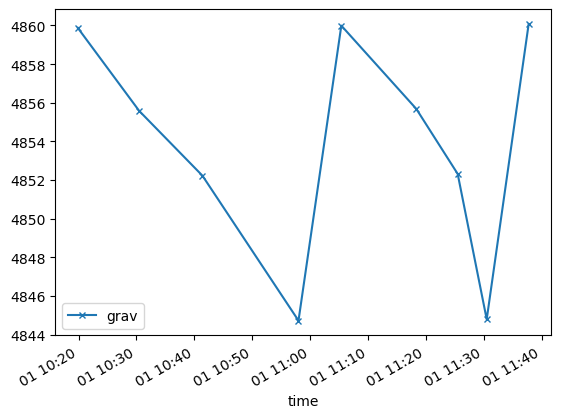

In [8]:
df.plot(x="time", y="grav", marker="x", markersize=5);

We can also plot the gravity over depth.

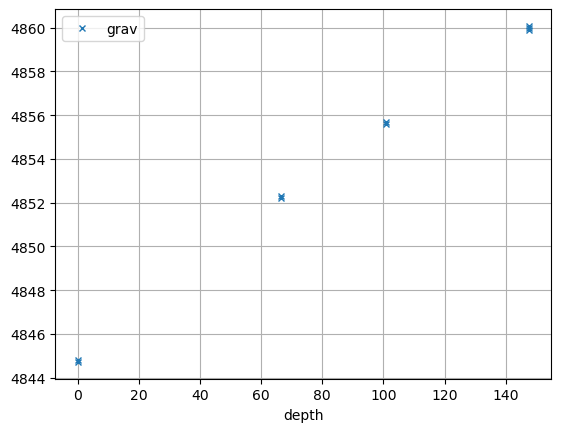

In [10]:
df.plot(x="depth", y="grav", ls="None", marker="x", markersize=5)
plt.grid()

Next, we are extracting the base point (`P0`) and plot its variation over time.

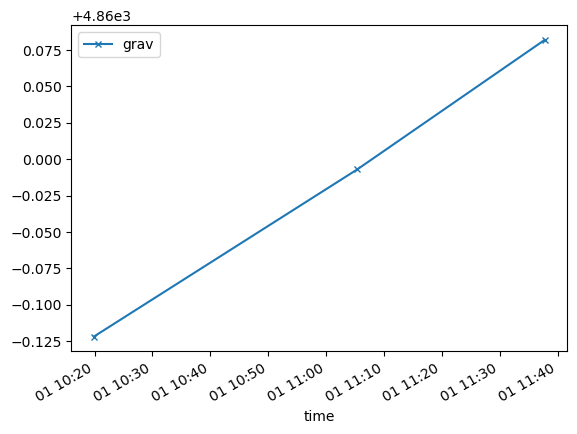

In [11]:
base = df[df["point"] == "P0"]
base.plot(x="time", y="grav", marker="x", markersize=5);

This repeated measurement is considered the variation due to external influences. We therefore interpolate it to all measuring times and subtract it from the original measurement, obtaining a relative gravity change with the result that it is zero at all P0 readings.

  point   depth      grav     sd                time           g0         dg
0    P0  147.51  4859.878  0.023 1900-01-01 10:19:52  4859.878000   0.000000
1    P1  100.93  4855.577  0.023 1900-01-01 10:30:29  4859.904814  -4.327814
2    P2   66.52  4852.227  0.036 1900-01-01 10:41:24  4859.932385  -7.705385
3    P3    0.00  4844.721  0.038 1900-01-01 10:58:00  4859.974310 -15.253310
4    P0  147.51  4859.993  0.022 1900-01-01 11:05:24  4859.993000   0.000000
5    P1  100.93  4855.684  0.034 1900-01-01 11:18:21  4860.028609  -4.344609
6    P2   66.52  4852.319  0.029 1900-01-01 11:25:30  4860.048270  -7.729270
7    P3    0.00  4844.790  0.025 1900-01-01 11:30:31  4860.062064 -15.272064
8    P0  147.51  4860.082  0.032 1900-01-01 11:37:46  4860.082000   0.000000


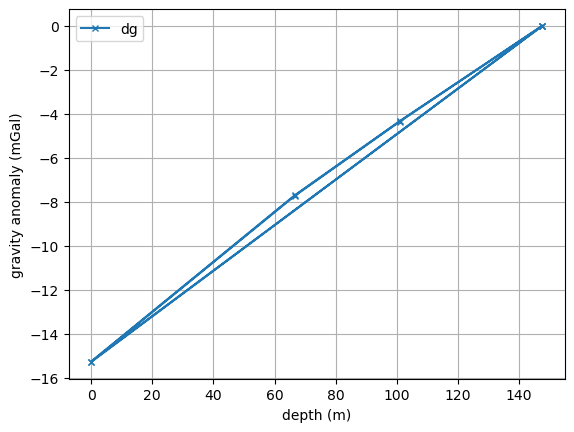

In [16]:
df["g0"] = np.interp(df.time, base.time, base.grav)
df["dg"] = df.grav - df.g0
print(df)
ax = df.plot("depth", "dg", ls="-", marker="x", markersize=5)
ax.set_ylabel("gravity anomaly (mGal)")
ax.set_xlabel("depth (m)")
ax.grid()

With those values we can compute the gravity gradients between subsequent levels and from that the interval density. Tip: fit a straight line by regression and use the slope. 
In order to get correct results, we need to correct the effects of the voids in the mine and the stockpile.